In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import datashader as ds
from datashader import transfer_functions as tf
from colorcet import fire

In [2]:
sheet_to_df_map = pd.read_excel('SSDB_Raw_Data.xlsx', sheet_name='INCIDENT',index_col=None)

In [3]:
sheet_to_df_map.to_csv('incident.csv',encoding='utf-8')

In [4]:
sheet_to_df_map = pd.read_excel('SSDB_Raw_Data.xlsx', sheet_name='SHOOTER',index_col=None)

In [5]:
sheet_to_df_map.to_csv('shooter.csv',encoding='utf-8')

In [6]:
sheet_to_df_map = pd.read_excel('SSDB_Raw_Data.xlsx', sheet_name='VICTIM',index_col=None)

In [7]:
sheet_to_df_map.to_csv('victim.csv',encoding='utf-8')

In [8]:
sheet_to_df_map = pd.read_excel('SSDB_Raw_Data.xlsx', sheet_name='WEAPON',index_col=None)

In [9]:
sheet_to_df_map.to_csv('weapon.csv',encoding='utf-8')

In [10]:
df_Incident= pd.read_csv('incident.csv')

In [11]:
df_Incident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2068 non-null   int64 
 1   Incident_ID         2068 non-null   object
 2   Sources             2068 non-null   object
 3   Number_News         693 non-null    object
 4   Media_Attention     733 non-null    object
 5   Reliability         2068 non-null   int64 
 6   Date                2068 non-null   object
 7   Quarter             2068 non-null   object
 8   School              2067 non-null   object
 9   City                2068 non-null   object
 10  State               2068 non-null   object
 11  School_Level        2044 non-null   object
 12  Location            2068 non-null   object
 13  Location_Type       2067 non-null   object
 14  During_School       2068 non-null   object
 15  Time_Period         2068 non-null   object
 16  First_Shot          1593

In [12]:
df_Incident.isna().sum()

Unnamed: 0               0
Incident_ID              0
Sources                  0
Number_News           1375
Media_Attention       1335
Reliability              0
Date                     0
Quarter                  0
School                   1
City                     0
State                    0
School_Level            24
Location                 0
Location_Type            1
During_School            0
Time_Period              0
First_Shot             475
Summary                  0
Narrative               15
Situation                0
Targets                306
Accomplice             301
Hostages                14
Barricade               14
Officer_Involved         8
Bullied                308
Domestic_Violence      156
Gang_Related           423
Preplanned              48
Shots_Fired            460
Active_Shooter_FBI     973
dtype: int64

In [13]:
df_Incident.head()

Unnamed: 0    Incident_ID  \
0           0  20200727AZCAO   
1           1  20200721SCBRO   
2           2  20200714MIWID   
3           3  20200704INLAM   
4           4  20200701ILFRP   

                                             Sources Number_News  \
0  https://www.kgun9.com/news/education/man-dies-...           3   
1  https://abcnews4.com/news/crime-news/person-of...           2   
2  https://www.detroitnews.com/story/news/local/m...           1   
3  https://www.abc57.com/news/murder-suspect-char...           2   
4  https://www.dailyherald.com/news/20200714/pros...           1   

  Media_Attention  Reliability        Date Quarter  \
0           Local            4  2020-07-27  Summer   
1           Local            3  2020-07-21  Summer   
2           Local            3  2020-07-14  Summer   
3           Local            4  2020-07-04  Summer   
4           Local            3  2020-07-01  Summer   

                           School              City  ... Accomplice Hostages  \
0      Canyon del Oro High School        Oro Valley  ...         No       No   
1     Brookdale Elementary School        Orangeburg  ...         No       No   
2  Willow Woods Elementary School           Detroit  ...         No       No   
3    Lake Hills Elementary School     Michigan City  ...         No       No   
4         Frost Elementary School  Prospect Heights  ...        Yes       No   

  Barricade Officer_Involved Bullied Domestic_Violence Gang_Related  \
0        No               No      No                No           No   
1        No               No      No                No          NaN   
2        No               No      No                No           No   
3        No               No      No                No           No   
4        No               No      No                No          Yes   

  Preplanned Shots_Fired Active_Shooter_FBI  
0         No     Unknown                 No  
1         No     Unknown                 No  
2         No     Unknown                 No  
3         No         NaN                 No  
4         No     Unknown                 No  

[5 rows x 31 columns]

In [14]:
#preprocessing

In [15]:
df_Incident['School'].fillna("Unknown", inplace = True)
df_Incident['School_Level'].fillna("Unknown", inplace = True)
df_Incident['Location_Type'].fillna("Unknown", inplace = True)

In [16]:
df_Incident['First_Shot'].fillna("Unknown", inplace = True)
df_Incident['Narrative'].fillna("Unknown", inplace = True)
df_Incident['Targets'].fillna("Unknown", inplace = True)

In [17]:
df_Incident['Shots_Fired'].fillna("Unknown", inplace = True)
df_Incident['Preplanned'].fillna("Unknown", inplace = True)

In [18]:
df_Incident.isna().sum()

Unnamed: 0               0
Incident_ID              0
Sources                  0
Number_News           1375
Media_Attention       1335
Reliability              0
Date                     0
Quarter                  0
School                   0
City                     0
State                    0
School_Level             0
Location                 0
Location_Type            0
During_School            0
Time_Period              0
First_Shot               0
Summary                  0
Narrative                0
Situation                0
Targets                  0
Accomplice             301
Hostages                14
Barricade               14
Officer_Involved         8
Bullied                308
Domestic_Violence      156
Gang_Related           423
Preplanned               0
Shots_Fired              0
Active_Shooter_FBI     973
dtype: int64

In [19]:
df_Shooter= pd.read_csv('shooter.csv')

In [20]:
df_Shooter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2293 non-null   int64 
 1   incidentid         2293 non-null   object
 2   age                2293 non-null   object
 3   gender             2293 non-null   object
 4   race               2293 non-null   object
 5   schoolaffiliation  2150 non-null   object
 6   shooteroutcome     2293 non-null   object
 7   shooterdied        2293 non-null   object
 8   injury             2293 non-null   object
 9   chargesfiled       714 non-null    object
 10  verdict            190 non-null    object
 11  minorchargedadult  251 non-null    object
 12  criminalhistory    201 non-null    object
dtypes: int64(1), object(12)
memory usage: 233.0+ KB


In [21]:
df_Shooter.isna().sum()

Unnamed: 0              0
incidentid              0
age                     0
gender                  0
race                    0
schoolaffiliation     143
shooteroutcome          0
shooterdied             0
injury                  0
chargesfiled         1579
verdict              2103
minorchargedadult    2042
criminalhistory      2092
dtype: int64

In [22]:
df_Victim= pd.read_csv('victim.csv')

In [23]:
df_Victim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3096 non-null   int64 
 1   incidentid         3096 non-null   object
 2   race               317 non-null    object
 3   injury             3096 non-null   object
 4   gender             3096 non-null   object
 5   schoolaffiliation  2772 non-null   object
 6   age                2814 non-null   object
 7   age_group          3096 non-null   object
dtypes: int64(1), object(7)
memory usage: 193.6+ KB


In [24]:
df_Weapon= pd.read_csv('weapon.csv')

In [25]:
df_Weapon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2070 non-null   int64 
 1   incidentid     2070 non-null   object
 2   weaponcaliber  1741 non-null   object
 3   weapondetails  393 non-null    object
 4   weapontype     2070 non-null   object
dtypes: int64(1), object(4)
memory usage: 81.0+ KB


In [26]:
df_Weapon.isna().sum()

Unnamed: 0          0
incidentid          0
weaponcaliber     329
weapondetails    1677
weapontype          0
dtype: int64

In [27]:
#Preprocessing 

In [28]:
#replacing null values for weapon table to meaningful name

In [29]:
df_Weapon['weaponcaliber'].fillna("No Data", inplace = True)
df_Weapon['weapondetails'].fillna("No Data", inplace = True)

In [30]:
df_Weapon.isna().sum()

Unnamed: 0       0
incidentid       0
weaponcaliber    0
weapondetails    0
weapontype       0
dtype: int64

In [31]:
# Intial analysis

In [32]:
# Number of incidents per year using pie chart

In [33]:
dates = df_Incident['Date']
df = pd.DataFrame({'StartDate': dates})
df['StartDate'] = pd.to_datetime(df['StartDate'])
us_school_incidents=df['StartDate'].dt.year
us_school_incidents

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
2063    2022
2064    2022
2065    2022
2066    2022
2067    2022
Name: StartDate, Length: 2068, dtype: int64

In [34]:
len(df_Incident)

2068

In [35]:
us_school_incidents.value_counts

<bound method IndexOpsMixin.value_counts of 0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
2063    2022
2064    2022
2065    2022
2066    2022
2067    2022
Name: StartDate, Length: 2068, dtype: int64>

In [36]:
us_school_incidents.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 2021, 2022])

Text(0.5, 1.0, 'Percentage of yearly incidents')

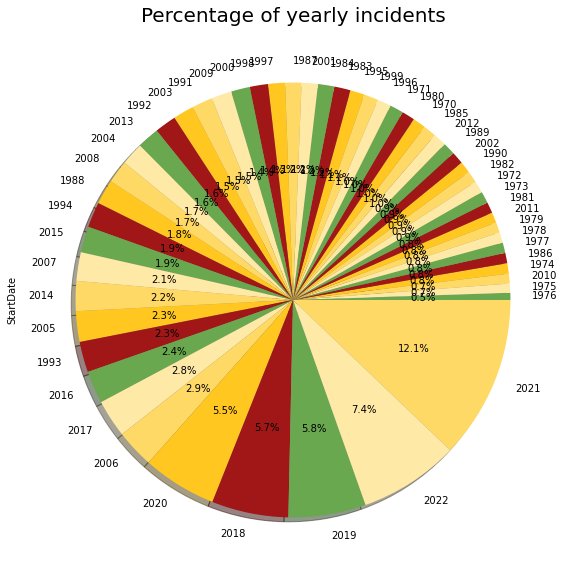

In [37]:
plt.figure(figsize = (25,10))
explode = (0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0)
plt.xticks(rotation=0,fontsize = 50)
plt.yticks(rotation=0,fontsize = 15)
colors = ['#6aa84f','#fee9a7', '#ffd966', '#ffc71f', '#a11717']
(us_school_incidents.value_counts(ascending = True)*100/len(df_Incident)).plot(kind = "pie", autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True)
plt.title("Percentage of yearly incidents", fontsize = 20)

Text(0.5, 1.0, 'US school schooting incidents by State (1970-2022)')

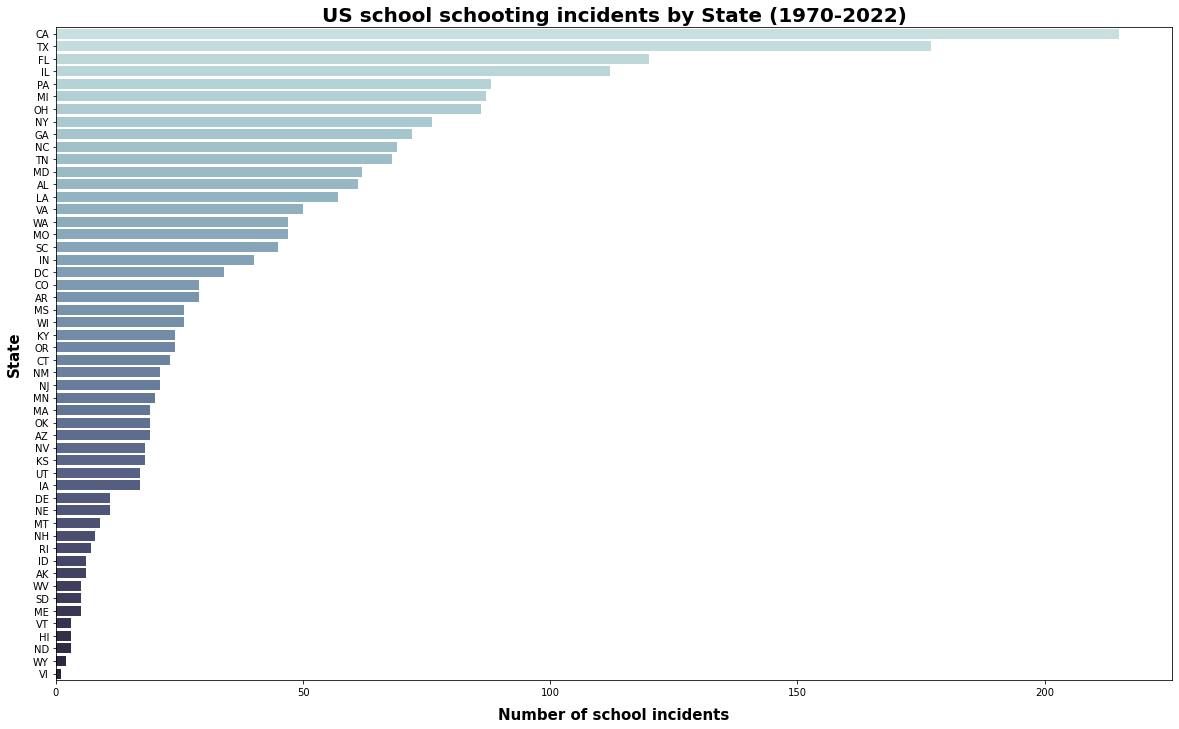

In [38]:
# Numbe of incidents per state using bar chart

plt.figure(figsize=(20,12))
states = sns.countplot(y = 'State', data = df_Incident, order = df_Incident['State'].value_counts().index, palette="ch:start=.2,rot=-.3")
plt.ylabel("State", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('Number of school incidents', labelpad=10,fontsize=15, weight='bold')
plt.title('US school schooting incidents by State (1970-2022)',fontsize=20, weight='bold')

In [39]:
df_Victim['injury'].value_counts()

Wounded           1837
Fatal              684
None               481
Minor Injuries      94
Name: injury, dtype: int64

Text(0.5, 1.0, 'Distribution of Injuries 1970-2022')

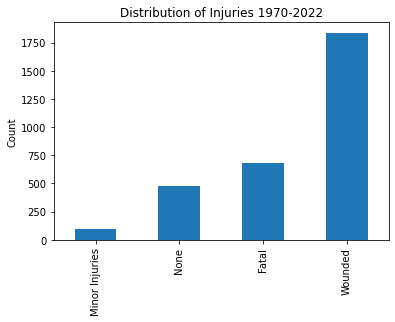

In [40]:
#Number of incidents for each injury
ax=df_Victim.injury.value_counts().sort_values().plot(kind='bar')
ax.set_ylabel("Count")
ax.set_title("Distribution of Injuries 1970-2022")

In [41]:
#https://www.chds.us/ssdb/charts-graphs/ pls replicate thisquestions

In [42]:
# Time based analysis

In [43]:
#number of victims per year
#number of incidents  per year

# no of attacks per quarter
#no of attacks per week of the year
#no of attacks per weekdays
#no of attacks per daya of the month

In [44]:
# general analysis

In [45]:
#Top 10 cities of mass shooting
#Top 10 states of mass shooting
#Attacks by gender
#vicitms targetd by gender
#no of atatcks by race
#no of attacks by age group or age
#Deaths, Injuries and Total Victims in all states
#total us school populations(1995-present)

In [192]:
df_Shooter

Unnamed: 0     incidentid      age   gender      race  \
0              0  19700105DCHIW       15     Male   Unknown   
1              1  19700105DCSOW  Unknown     Male   Unknown   
2              2  19700105DCUNW  Unknown     Male   Unknown   
3              3  19700206OHJOC       18     Male  Hispanic   
4              4  19700323CADAL       16     Male  Hispanic   
...          ...            ...      ...      ...       ...   
2288        2288  20220608ARLIL  Unknown  Unknown   Unknown   
2289        2289  20220609ALWAG  Unknown  Unknown   Unknown   
2290        2290  20220610ALBYB     Teen     Male   Unknown   
2291        2291  20220613WAMAE       15     Male   Unknown   
2292        2292  20220531LAMON       40     Male   Unknown   

       schoolaffiliation    shooteroutcome shooterdied injury  \
0                Student           Unknown          No   None   
1                Student       Surrendered          No   None   
2                Student      Fled/Escaped          No   None   
3                Student           Unknown          No   None   
4                Student       Surrendered          No   None   
...                  ...               ...         ...    ...   
2288         No Relation      Fled/Escaped          No   None   
2289  Police Officer/SRO   Law Enforcement          No   None   
2290             Student  Fled/Apprehended          No   None   
2291             Student  Fled/Apprehended          No   None   
2292            Relative  Fled/Apprehended          No   None   

                                           chargesfiled    verdict  \
0                                                   NaN        NaN   
1                                                   NaN        NaN   
2                                                   NaN        NaN   
3                                                   NaN  1-5 years   
4                  Assault with intent to commit murder        NaN   
...                                                 ...        ...   
2288                                                NaN        NaN   
2289                                                NaN        NaN   
2290                                                NaN        NaN   
2291  unlawful possession of a firearm, disturbing s...        NaN   
2292  manslaughter and possession of a firearm in a ...        NaN   

     minorchargedadult criminalhistory  
0                  NaN             NaN  
1                  NaN             NaN  
2                  NaN             NaN  
3                  NaN             NaN  
4                  NaN             NaN  
...                ...             ...  
2288               NaN             NaN  
2289               NaN             NaN  
2290               NaN             NaN  
2291               NaN             NaN  
2292               NaN             NaN  

[2293 rows x 13 columns]

In [47]:
# incidents per year
df_Incident['year'] = df_Incident['Date'].str[:4]
ipy =  df_Incident.groupby(['year', 'Active_Shooter_FBI'])['Incident_ID'].count().reset_index(name='count')
ipy
inc_loc =  df_Incident.groupby(['Location'])['Incident_ID'].count().reset_index(name='count')
inc_loc
inc_tp =  df_Incident.groupby(['Time_Period'])['Incident_ID'].count().reset_index(name='count')
inc_tp
inc_stn =  df_Incident.groupby(['Situation'])['Incident_ID'].count().reset_index(name='count')
inc_stn

Situation  count
0                               Accidental    203
1   Anger Over Grade/Suspension/Discipline     57
2                                 Bullying     37
3              Domestic w/ Targeted Victim     92
4                        Drive-by Shooting    140
5                    Escalation of Dispute    720
6                         Hostage/Standoff     49
7                         Illegal Activity    140
8                  Indiscriminate Shooting     96
9              Intentional Property Damage     53
10                          Murder/Suicide     23
11                         Murder/Suicide       1
12               Officer-Involved Shooting      8
13                               Psychosis     36
14                                  Racial     14
15                            Self-defense     12
16                       Suicide/Attempted    147
17                                 Unknown    240

In [48]:
df_Victim['injury'].unique()
df_Victim['year']= df_Victim['incidentid'].str[:4]

In [190]:
# victims per year
vpy =  df_Victim.groupby(['year', 'injury'])['injury'].count().reset_index(name='count')
vpy


year          injury  count
0    1970           Fatal      8
1    1970            None      1
2    1970         Wounded     24
3    1971           Fatal      7
4    1971  Minor Injuries      1
..    ...             ...    ...
170  2021         Wounded    148
171  2022           Fatal     50
172  2022  Minor Injuries     21
173  2022            None     15
174  2022         Wounded    108

[175 rows x 3 columns]

In [50]:
# victims per year by age group
age_inc =  df_Victim.groupby(['year', 'age_group'])['incidentid'].count().reset_index(name='count')
age_inc


year       age_group  count
0    1970     Adult (20+)      6
1    1970   Teen (13 -19)     27
2    1971     Adult (20+)      4
3    1971   Teen (13 -19)     24
4    1972     Adult (20+)      8
..    ...             ...    ...
204  2022     Adult (20+)     61
205  2022  Between 6 & 12      5
206  2022      Child (<6)     30
207  2022       No Victim     23
208  2022   Teen (13 -19)     75

[209 rows x 3 columns]

In [51]:
df_Shooter['schoolaffiliation'].unique()

array(['Student', 'Police Officer/SRO', 'No Relation', 'Unknown',
       'Security Guard', 'Former Student', 'Other Staff', 'Teacher',
       'Nonstudent', 'Other Student', 'Intimate Relationship', 'Relative',
       'Former Teacher', 'Gang Member', 'Parent',
       'Nonstudent Using Athletic Facilities/Attending Game',
       'Rival School Student', 'Hitman', 'Friend', nan,
       'Principal/Vice-Principal'], dtype=object)

In [52]:
df_Shooter

Unnamed: 0     incidentid      age   gender      race  \
0              0  19700105DCHIW       15     Male   Unknown   
1              1  19700105DCSOW  Unknown     Male   Unknown   
2              2  19700105DCUNW  Unknown     Male   Unknown   
3              3  19700206OHJOC       18     Male  Hispanic   
4              4  19700323CADAL       16     Male  Hispanic   
...          ...            ...      ...      ...       ...   
2288        2288  20220608ARLIL  Unknown  Unknown   Unknown   
2289        2289  20220609ALWAG  Unknown  Unknown   Unknown   
2290        2290  20220610ALBYB     Teen     Male   Unknown   
2291        2291  20220613WAMAE       15     Male   Unknown   
2292        2292  20220531LAMON       40     Male   Unknown   

       schoolaffiliation    shooteroutcome shooterdied injury  \
0                Student           Unknown          No   None   
1                Student       Surrendered          No   None   
2                Student      Fled/Escaped          No   None   
3                Student           Unknown          No   None   
4                Student       Surrendered          No   None   
...                  ...               ...         ...    ...   
2288         No Relation      Fled/Escaped          No   None   
2289  Police Officer/SRO   Law Enforcement          No   None   
2290             Student  Fled/Apprehended          No   None   
2291             Student  Fled/Apprehended          No   None   
2292            Relative  Fled/Apprehended          No   None   

                                           chargesfiled    verdict  \
0                                                   NaN        NaN   
1                                                   NaN        NaN   
2                                                   NaN        NaN   
3                                                   NaN  1-5 years   
4                  Assault with intent to commit murder        NaN   
...                                                 ...        ...   
2288                                                NaN        NaN   
2289                                                NaN        NaN   
2290                                                NaN        NaN   
2291  unlawful possession of a firearm, disturbing s...        NaN   
2292  manslaughter and possession of a firearm in a ...        NaN   

     minorchargedadult criminalhistory  
0                  NaN             NaN  
1                  NaN             NaN  
2                  NaN             NaN  
3                  NaN             NaN  
4                  NaN             NaN  
...                ...             ...  
2288               NaN             NaN  
2289               NaN             NaN  
2290               NaN             NaN  
2291               NaN             NaN  
2292               NaN             NaN  

[2293 rows x 13 columns]

In [53]:
school_aff =  df_Shooter.groupby(['schoolaffiliation'])['incidentid'].count().reset_index(name='count')
school_aff


schoolaffiliation  count
0                                      Former Student     80
1                                      Former Teacher      2
2                                              Friend      1
3                                         Gang Member      6
4                                              Hitman      1
5                               Intimate Relationship     35
6                                         No Relation    441
7                                          Nonstudent     26
8   Nonstudent Using Athletic Facilities/Attending...     91
9                                         Other Staff     21
10                                      Other Student     11
11                                             Parent     48
12                                 Police Officer/SRO     42
13                           Principal/Vice-Principal      1
14                                           Relative     27
15                               Rival School Student     29
16                                     Security Guard      4
17                                            Student    934
18                                            Teacher     18
19                                            Unknown    332

In [61]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
location = geolocator.geocode("Chicago IL")
print(location.latitude, location.longitude)

41.8755616 -87.6244212


In [88]:
df_Incident["City"]

0             Oro Valley
1             Orangeburg
2                Detroit
3          Michigan City
4       Prospect Heights
              ...       
2063             Detroit
2064         Little Rock
2065             Gadsden
2066             Byhalia
2067             Everett
Name: City, Length: 2068, dtype: object

In [90]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
longitude = []
latitude = []
for i in (df_Incident["City"]):    
    geolocator = Nominatim(user_agent="your_app_name") 
    loc = geolocator.geocode(i)
    if loc!= None:
        
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [91]:
df_Incident["Longitude"] = longitude
df_Incident["Latitude"] = latitude

In [139]:
df_Incident['year'].min()

'1970'

In [96]:
df_Incident.drop(['loc'], axis=1)

Unnamed: 0    Incident_ID  \
0              0  20200727AZCAO   
1              1  20200721SCBRO   
2              2  20200714MIWID   
3              3  20200704INLAM   
4              4  20200701ILFRP   
...          ...            ...   
2063        2063  20220607MIPED   
2064        2064  20220608ARLIL   
2065        2065  20220609ALWAG   
2066        2066  20220610ALBYB   
2067        2067  20220613WAMAE   

                                                Sources Number_News  \
0     https://www.kgun9.com/news/education/man-dies-...           3   
1     https://abcnews4.com/news/crime-news/person-of...           2   
2     https://www.detroitnews.com/story/news/local/m...           1   
3     https://www.abc57.com/news/murder-suspect-char...           2   
4     https://www.dailyherald.com/news/20200714/pros...           1   
...                                                 ...         ...   
2063  https://www.wxyz.com/news/shots-fired-at-persh...           4   
2064  https://www.kark.com/crime/lrpd-school-bus-hit...           5   
2065  https://www.live5news.com/2022/06/09/potential...         100   
2066  https://www.actionnews5.com/2022/06/10/student...           3   
2067  https://www.q13fox.com/news/deputies-arrest-15...           5   

     Media_Attention  Reliability        Date Quarter  \
0              Local            4  2020-07-27  Summer   
1              Local            3  2020-07-21  Summer   
2              Local            3  2020-07-14  Summer   
3              Local            4  2020-07-04  Summer   
4              Local            3  2020-07-01  Summer   
...              ...          ...         ...     ...   
2063           Local            4  2022-06-07  Summer   
2064        National            4  2022-06-08  Summer   
2065        National            4  2022-06-09  Summer   
2066           Local            4  2022-06-10  Summer   
2067           Local            4  2022-06-13  Summer   

                               School              City  ... Gang_Related  \
0          Canyon del Oro High School        Oro Valley  ...           No   
1         Brookdale Elementary School        Orangeburg  ...          NaN   
2      Willow Woods Elementary School           Detroit  ...           No   
3        Lake Hills Elementary School     Michigan City  ...           No   
4             Frost Elementary School  Prospect Heights  ...          Yes   
...                               ...               ...  ...          ...   
2063             Pershing High School           Detroit  ...          NaN   
2064  Little Rock School District Bus       Little Rock  ...          NaN   
2065    Walnut Park Elementary School           Gadsden  ...          NaN   
2066              Byhalia High School           Byhalia  ...          NaN   
2067              Mariner High School           Everett  ...          NaN   

     Preplanned Shots_Fired Active_Shooter_FBI  year             location  \
0            No     Unknown                 No  2020        Oro Valley AZ   
1            No     Unknown                 No  2020        Orangeburg SC   
2            No     Unknown                 No  2020           Detroit MI   
3            No     Unknown                 No  2020     Michigan City IN   
4            No     Unknown                 No  2020  Prospect Heights IL   
...         ...         ...                ...   ...                  ...   
2063         No          99                 No  2022           Detroit MI   
2064         No          99                 No  2022       Little Rock AR   
2065    Unknown     Unknown                 No  2022           Gadsden AL   
2066         No           1                 No  2022           Byhalia MS   
2067         No          99                 No  2022           Everett WA   

            lon        lat   Longitude   Latitude  
0    -76.866923  39.104412 -110.980646  32.409517  
1    -76.866923  39.104412  -80.855648  33.491820  
2    -76.866923  39.104412  -83.046640  4

In [173]:
import altair as alt
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, feature='states')
selection = alt.selection_multi(fields=['Quarter'])
color = alt.condition(selection, alt.Color('Quarter:N'), alt.value('lightgray'))

#make_selector = alt.Chart(df_Incident).mark_rect().encode(longitude='Longitude:Q',
#    latitude='Latitude:Q',color=color).add_selection(selection)

background = alt.Chart(states).mark_geoshape(
    fill='black',
    #stroke='white'
).project('albersUsa').properties(
    width=800,
    height=500
)

x = alt.Chart(df_Incident).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.value(10),
    #tooltip='Situation'
    color= color,
    opacity=alt.value(11)
    
).project(
    "albersUsa"
).properties(
    width=800,
    height=500
).add_selection(
     selection
).transform_filter(selection)

background+ x

alt.LayerChart(...)

In [126]:
df_Incident['Situation'].unique()

array(['Accidental', 'Escalation of Dispute', 'Illegal Activity',
       'Drive-by Shooting', 'Intentional Property Damage', 'Unknown',
       'Indiscriminate Shooting', 'Suicide/Attempted',
       'Domestic w/ Targeted Victim', 'Self-defense', 'Bullying',
       'Hostage/Standoff', 'Anger Over Grade/Suspension/Discipline',
       'Murder/Suicide', 'Psychosis', 'Racial',
       'Officer-Involved Shooting', 'Murder/Suicide '], dtype=object)

In [186]:
import altair as alt
import altair as alt
from vega_datasets import data

input_dropdown = alt.binding_select(options=df_Incident['Situation'].unique(), name='Situation')
input_dropdown_2 = alt.binding_select(options=df_Incident['Quarter'].unique(), name='Quarter')

selection_situation = alt.selection_single(fields=['Situation'], bind=input_dropdown)

selection_season = alt.selection_single(fields=['Quarter'], bind=input_dropdown_2)
color=alt.condition(selection_situation | selection_season, 'Situation', alt.ColorValue("grey"))

#slider = alt.binding_range(min=df_Incident['year'].min(), max=df_Incident['year'].max(), step=1, name='cutoff:')
#selector = alt.selection_single(name="year", fields=['cutoff'],
#                                bind=slider, init={'cutoff': 2022})

#color = alt.condition(selection,
#                    alt.Color('Situation:N', legend=None),
#                    alt.value('lightgray'))

#click = alt.selection_multi(encodings=['color'])
interval = alt.selection_interval()
hist = alt.Chart(df_Incident).mark_bar().encode(
    x='count()',
    y='Situation',
    color='Situation'
).transform_filter(
    interval
)


states = alt.topo_feature(data.us_10m.url, feature='states')

background = alt.Chart(states).mark_geoshape(
    fill='black',
    #stroke='white'
).project('albersUsa').properties(
    width=800,
    height=500
)

x = alt.Chart(df_Incident).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.value(10),
    #tooltip='Situation'
    color= color,
    opacity=alt.value(11)
    
).project(
    "albersUsa"
).properties(
    width=800,
    height=500
).add_selection(
     selection_season,selection_situation#,interval
)

background+x#+hist

alt.LayerChart(...)

In [189]:
df_Victim

Unnamed: 0     incidentid   race   injury  gender schoolaffiliation  \
0              0  19700105DCHIW    NaN    Fatal    Male           Student   
1              1  19700105DCSOW    NaN  Wounded    Male           Student   
2              2  19700105DCUNW    NaN     None    Male           Unknown   
3              3  19700206OHJOC    NaN  Wounded    Male           Student   
4              4  19700323CADAL    NaN  Wounded    Male    Security Guard   
...          ...            ...    ...      ...     ...               ...   
3091        3091  20220531LAMON    NaN  Wounded    Male          Relative   
3092        3092  20220601CAULL    NaN  Wounded    Male           Student   
3093        3093  20220605INWEG    NaN  Wounded    Male               NaN   
3094        3094  20220605INWEG    NaN  Wounded  Female               NaN   
3095        3095  20220609ALWAG  Black    Fatal    Male       No Relation   

        age      age_group  year  
0        15  Teen (13 -19)  1970  
1      Teen  Teen (13 -19)  1970  
2        16  Teen (13 -19)  1970  
3        18  Teen (13 -19)  1970  
4        44    Adult (20+)  1970  
...     ...            ...   ...  
3091  Adult    Adult (20+)  2022  
3092     16  Teen (13 -19)  2022  
3093     19  Teen (13 -19)  2022  
3094     19  Teen (13 -19)  2022  
3095     32    Adult (20+)  2022  

[3096 rows x 9 columns]